# Analyzing a Health-Related Dataset

**Load the dataset**

**source**: https://www.kaggle.com/datasets/thedevastator/predicting-heart-disease-risk-using-clinical-var

In [1]:
import pandas as pd
df=pd.read_csv("Heart_Disease_Prediction.csv")
print(df.head())

   index  Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  \
0      0   70    1                4  130          322             0   
1      1   67    0                3  115          564             0   
2      2   57    1                2  124          261             0   
3      3   64    1                4  128          263             0   
4      4   74    0                2  120          269             0   

   EKG results  Max HR  Exercise angina  ST depression  Slope of ST  \
0            2     109                0            2.4            2   
1            2     160                0            1.6            2   
2            0     141                0            0.3            1   
3            0     105                1            0.2            2   
4            2     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7    

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    270 non-null    int64  
 1   Age                      270 non-null    int64  
 2   Sex                      270 non-null    int64  
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  Heart Disease            2

## Descriptive Statistics

**Dropping non-numeric or categorical columns**

In [9]:
numeric_columns = df.drop(columns=["index", "Heart Disease"]).select_dtypes(include=["float64", "int64"]).columns

**Calculating mean, median, mode, standard deviation, and variance for each feature**

In [18]:
statistics = pd.DataFrame({
    "Mean": df[numeric_columns].mean(),
    "Median": df[numeric_columns].median(),
    "Mode": df[numeric_columns].mode().iloc[0], 
    "Standard Deviation": df[numeric_columns].std(),
    "Variance": df[numeric_columns].var()
})
print(statistics)

                               Mean  Median   Mode  Standard Deviation  \
Age                       54.433333    55.0   54.0            9.109067   
Sex                        0.677778     1.0    1.0            0.468195   
Chest pain type            3.174074     3.0    4.0            0.950090   
BP                       131.344444   130.0  120.0           17.861608   
Cholesterol              249.659259   245.0  234.0           51.686237   
FBS over 120               0.148148     0.0    0.0            0.355906   
EKG results                1.022222     2.0    2.0            0.997891   
Max HR                   149.677778   153.5  162.0           23.165717   
Exercise angina            0.329630     0.0    0.0            0.470952   
ST depression              1.050000     0.8    0.0            1.145210   
Slope of ST                1.585185     2.0    1.0            0.614390   
Number of vessels fluro    0.670370     0.0    0.0            0.943896   
Thallium                   4.696296   

## Inferential Statistics

**Conducting a hypothesis test for cholesterol**

**feature:** Cholesterol

In [13]:
from scipy import stats
feature = 'Cholesterol'
hypothesized_mean = 240
# Extract the feature data
cholesterol_data = df[feature].dropna()
# Perform a one-sample t-test
t_stat, p_value = stats.ttest_1samp(cholesterol_data, hypothesized_mean)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print(f"Reject the null hypothesis. The mean {feature} is significantly different from {hypothesized_mean}.")
else:
    print(f"Fail to reject the null hypothesis. There is no significant difference between the mean {feature} and {hypothesized_mean}.")


T-statistic: 3.070794749385062
P-value: 0.002353537266256652
Reject the null hypothesis. The mean Cholesterol is significantly different from 240.


**Computing a 95% confidence interval for the mean of cholesterol**

In [14]:
import numpy as np
feature = 'Cholesterol'
data = df[feature].dropna()
# Compute the sample mean, standard deviation, and sample size
mean = np.mean(data)
std_dev = np.std(data, ddof=1)
n = len(data)
# Compute the 95% confidence interval
confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2) 
margin_of_error = z_score * (std_dev / np.sqrt(n))
# Confidence interval
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error
print(f"95% Confidence Interval for the mean of {feature}: ({lower_bound}, {upper_bound})")

95% Confidence Interval for the mean of Cholesterol: (243.49414507529292, 255.82437344322562)


**Performing a linear regression analysis to determine the relationship of cholesterol with Age and BP**

In [16]:
import statsmodels.api as sm
# Select the dependent variable (Y) and independent variables (X)
X = df[['Age', 'BP']]  # Independent variables
Y = df['Cholesterol']  # Dependent variable
# Add a constant to the independent variables (intercept)
X = sm.add_constant(X)
# Fit the linear regression model
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Cholesterol   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     8.855
Date:                Sun, 08 Sep 2024   Prob (F-statistic):           0.000189
Time:                        21:09:36   Log-Likelihood:                -1439.1
No. Observations:                 270   AIC:                             2884.
Df Residuals:                     267   BIC:                             2895.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        145.6031     26.007      5.599      0.0

### Interpretation of the Linear Regression Results:

1. **Coefficients**:
   - **const**: 145.60
     - This is the baseline level of cholesterol when both Age and BP are zero.
   - **Age**: 1.06
     - for every year of age,cholesterol level increases by avg of 1.06,BP is constant.
   - **BP**: 0.35
     - for every 1mm increase in BP,cholesterol level increases by avg of 0.35,age is constant

2. **P-values**:
   - **Age**: 0.003
     - Since this p-value is less than 0.05, we conclude that age is statistically significant in predicting cholesterol levels.
   - **BP**: 0.049
     - This p-value is also less than 0.05, so blood pressure is statistically significant.

3. **R-squared**: 0.062
   - This means that only 6.2% of the variability in cholesterol levels is explained by the model. This indicates a weak relationship between age, blood pressure, and cholesterol, suggesting that other factors also contribute to cholesterol levels.

4. **Prob (F-statistic):**: 0.000189
   - less than 0.05. This means at least one of the predictors (Age or BP) is significantly related to cholesterol.

### Summary:
- Both Age and Blood Pressure have a significant positive relationship with Cholesterol.
- the low R-squared value suggests that for this model other factors may be important.

**Creating visualizations to illustrate the relationship of cholesterol with Age and BP**

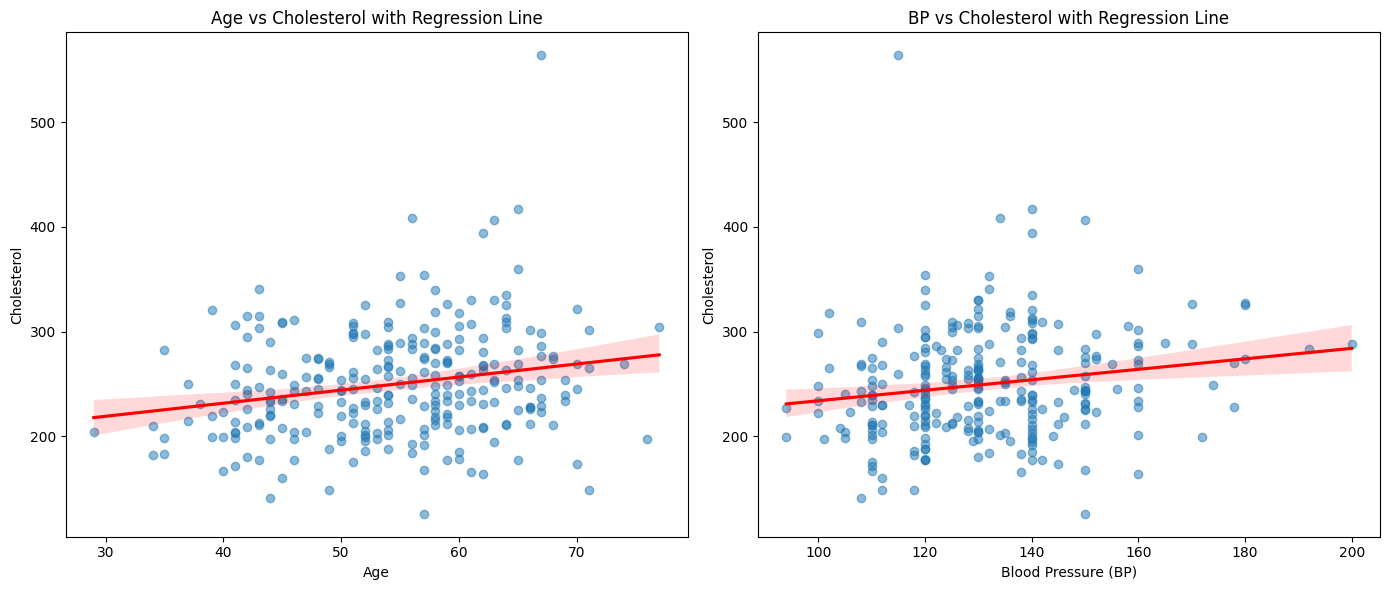

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# Scatter plot with regression line for Age vs Cholesterol
plt.figure(figsize=(14, 6))
# Age vs Cholesterol
plt.subplot(1, 2, 1)
sns.regplot(x='Age', y='Cholesterol', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Age vs Cholesterol with Regression Line')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
# BP vs Cholesterol
plt.subplot(1, 2, 2)
sns.regplot(x='BP', y='Cholesterol', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('BP vs Cholesterol with Regression Line')
plt.xlabel('Blood Pressure (BP)')
plt.ylabel('Cholesterol')
plt.tight_layout()
plt.show()